Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load data

In [4]:
data = pd.read_csv("/content/drive/MyDrive/NM data analytics/water_potability.csv")


Data pre processing

In [5]:
# Check for missing values
data.isnull().sum()

# Handle missing values (e.g., fill with mean, median, or interpolate)
data.fillna(data.mean(), inplace=True)


Exploratory Data Analysis (EDA)




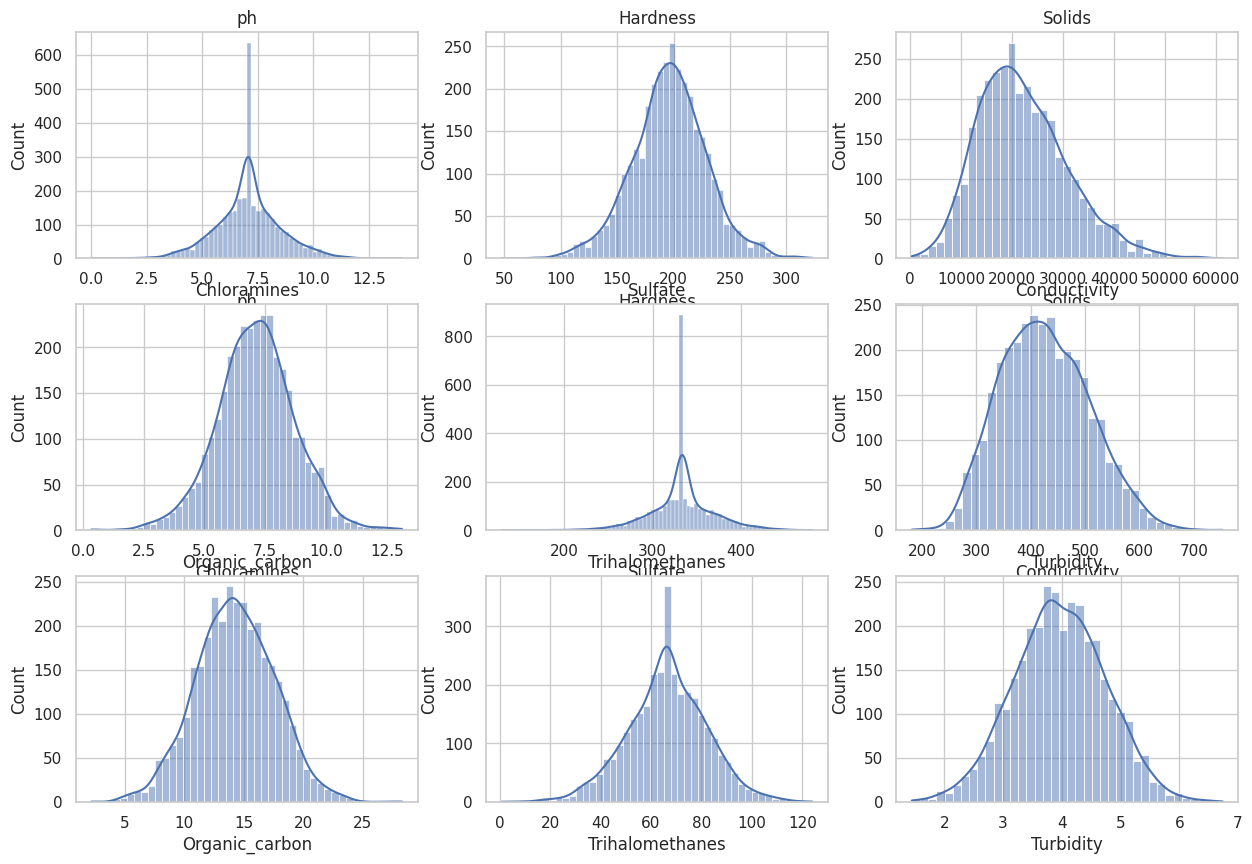

<Axes: >

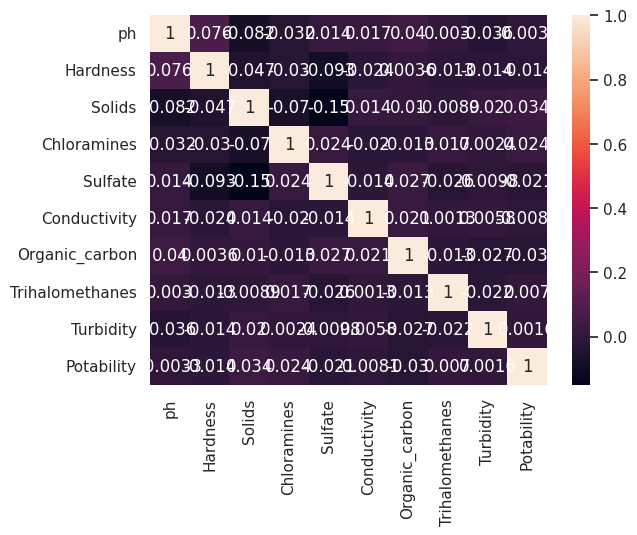

In [6]:
# Summary statistics
data.describe()

# Histogram for each numerical variable
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)


Predictive Modeling:

In [7]:
# Data Splitting:
#Split the data into features (X) and the target variable (y).

X = data.drop('Potability', axis=1)  # Features
y = data['Potability']  # Target variable


In [8]:
#Split the Data:

#Split your data into a training set and a test set to assess your model's performance

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


In [10]:
#Model Training:


model.fit(X_train, y_train)

LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.6280487804878049
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

[[412   0]
 [244   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Save the Model:we can save the trained model using joblib or pickle for future use.

In [12]:
import joblib

joblib.dump(model, 'water_potability_model.pkl')


['water_potability_model.pkl']

Create Flask App

In [28]:
!pip install flask-ngrok
!ngrok authtoken '2XYi8wmG715sG0bYOIS3dZJivMY_3g7TRpxb7RZpG23xE1mFg'


/bin/bash: line 1: ngrok: command not found


In [29]:

from flask import Flask, request, render_template
import pickle
import pandas as pd
import numpy as np
import joblib
scaler = joblib.load("/content/drive/MyDrive/NM data analytics/my_scaler.save")
app = Flask(__name__)
model=pickle.load(open('/content/water_potability_model.pkl','rb'))

@app.route("/home")
@app.route("/")
def hello():
    return render_template("predict.html")

@app.route("/predict", methods = ["GET", "POST"])
def predict():
    if request.method == "POST":
        input_features = [float(x) for x in request.form.values()]
        features_value = [np.array(input_features)]

        feature_names = ["ph", "Hardness" , "Solids", "Chloramines", "Sulfate",
                         "Conductivity", "Organic_carbon","Trihalomethanes", "Turbidity"]

        df = pd.DataFrame(features_value, columns = feature_names)
        df = scaler.transform(df)
        output = model.predict(df)

        if output[0] == 1:
            prediction = "safe"
        else:
            prediction = "not safe"


        return render_template('predict.html', prediction_text= "water is {} for human consumption ".format(prediction))

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [31]:
X = data.drop('Potability', axis=1)  # Features
y = data['Potability']  # Target variable


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


data visuvalizion

Text(0.5, 1.0, 'Potability')

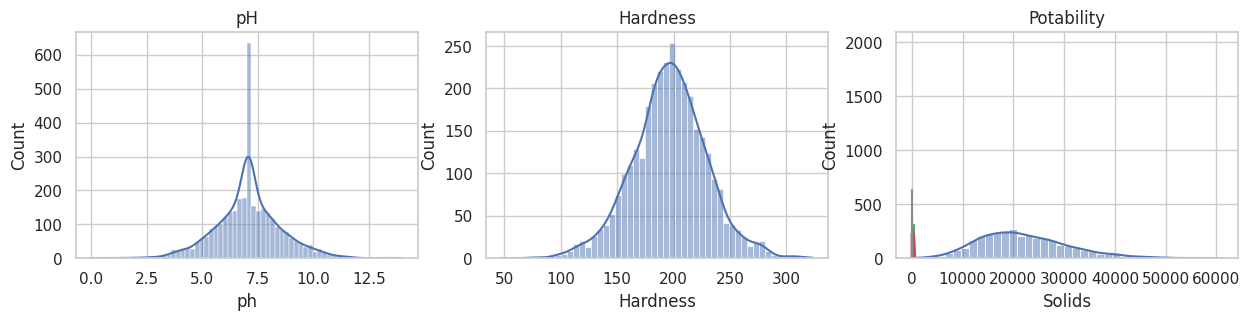

In [34]:

# Visualize the distribution of each metric
plt.figure(figsize=(15, 10))

# Visualize ph
plt.subplot(3, 3, 1)
sns.histplot(data['ph'], kde=True)
plt.title('pH')

# Visualize Hardness
plt.subplot(3, 3, 2)
sns.histplot(data['Hardness'], kde=True)
plt.title('Hardness')

# Visualize Solids
plt.subplot(3, 3, 3)
sns.histplot(data['Solids'], kde=True)
plt.title('Solids')

# Visualize Chloramines
plt.subplot(3, 3, 3)
sns.histplot(data['Chloramines'], kde=True)
plt.title('Chloramines')

# Visualize Sulfate
plt.subplot(3, 3, 3)
sns.histplot(data['Sulfate'], kde=True)
plt.title('Sulfate  ')

# Visualize Conductivity
plt.subplot(3, 3, 3)
sns.histplot(data['Conductivity'], kde=True)
plt.title('Conductivity')

# Visualize Organic_carbon
plt.subplot(3, 3, 3)
sns.histplot(data['Organic_carbon'], kde=True)
plt.title('Organic_carbon')

# Visualize Trihalomethanes
plt.subplot(3, 3, 3)
sns.histplot(data['Trihalomethanes'], kde=True)
plt.title('Trihalomethanes')

# Visualize Turbidity
plt.subplot(3, 3, 3)
sns.histplot(data['Turbidity'], kde=True)
plt.title('Turbidity')

# Visualize Potability
plt.subplot(3, 3, 3)
sns.histplot(data['Potability'], kde=True)
plt.title('Potability')



<Figure size 640x480 with 0 Axes>

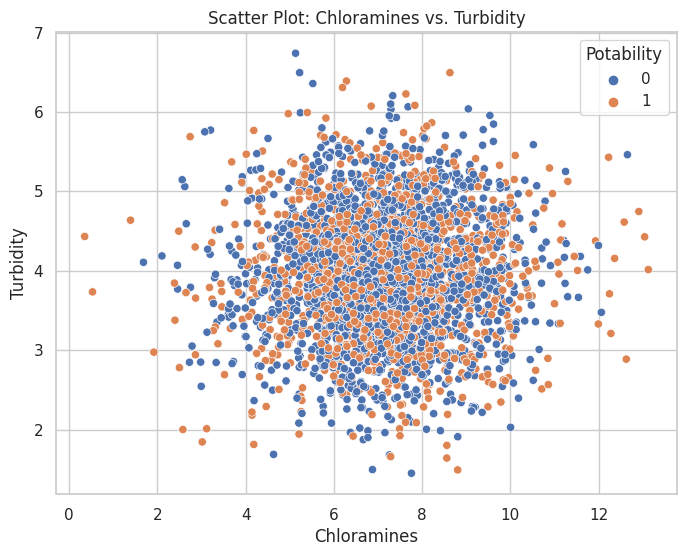

In [35]:

plt.tight_layout()
plt.show()

# You can also create other types of visualizations such as bar plots, scatter plots, and correlations.

# Example: Scatter plot between Chloramines and Turbidity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Chloramines', y='Turbidity', data=data, hue='Potability')
plt.title('Scatter Plot: Chloramines vs. Turbidity')
plt.show()



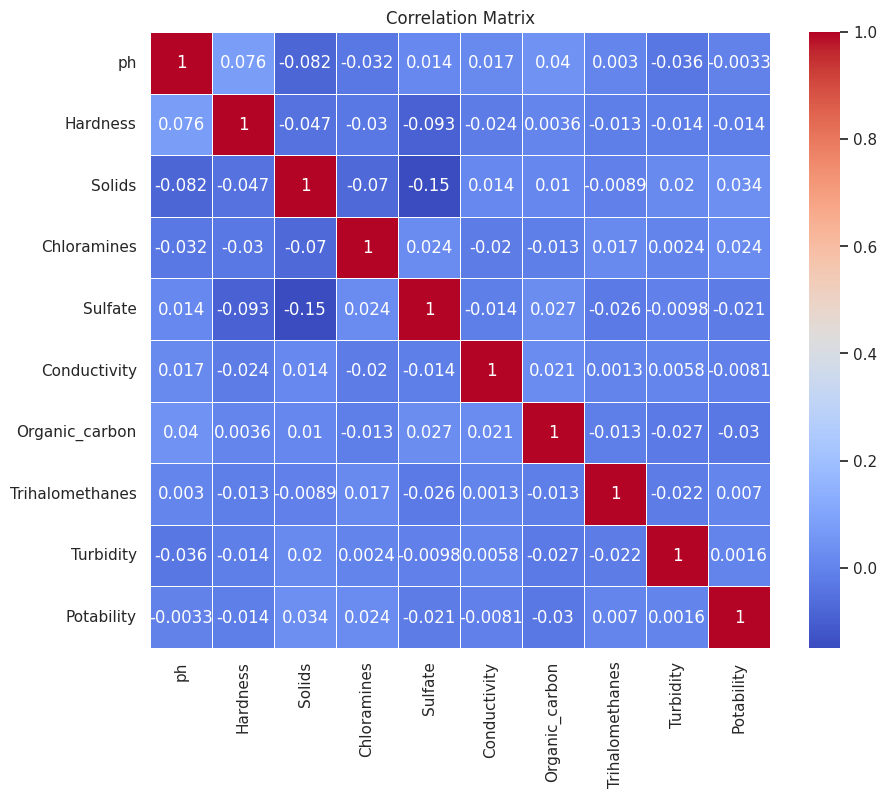

In [36]:

# Example: Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

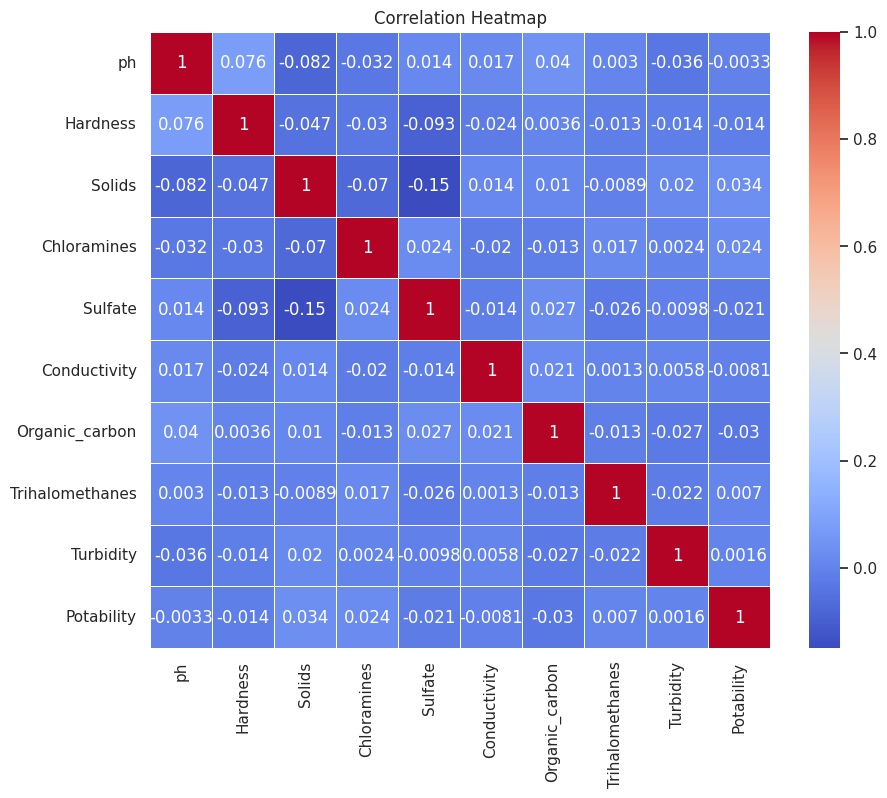

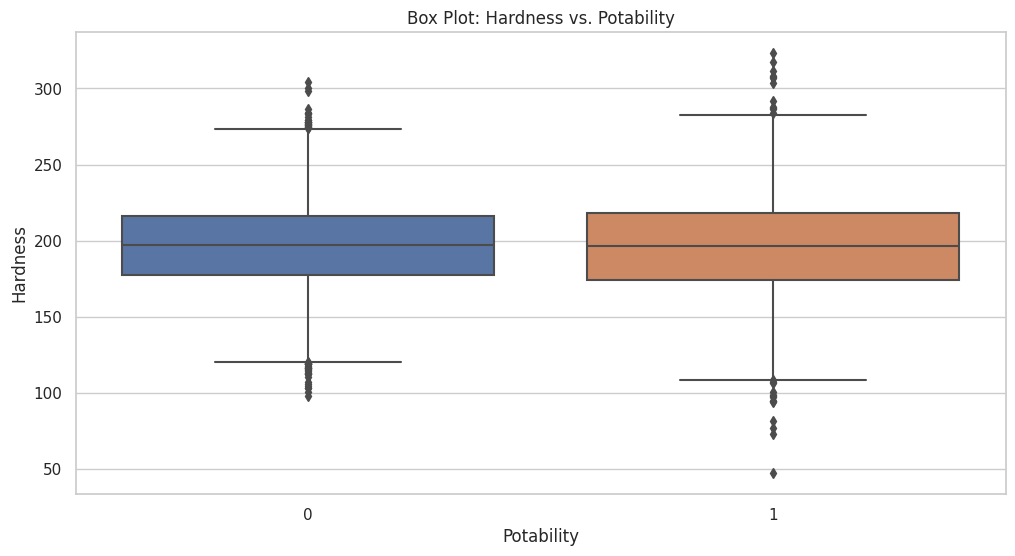

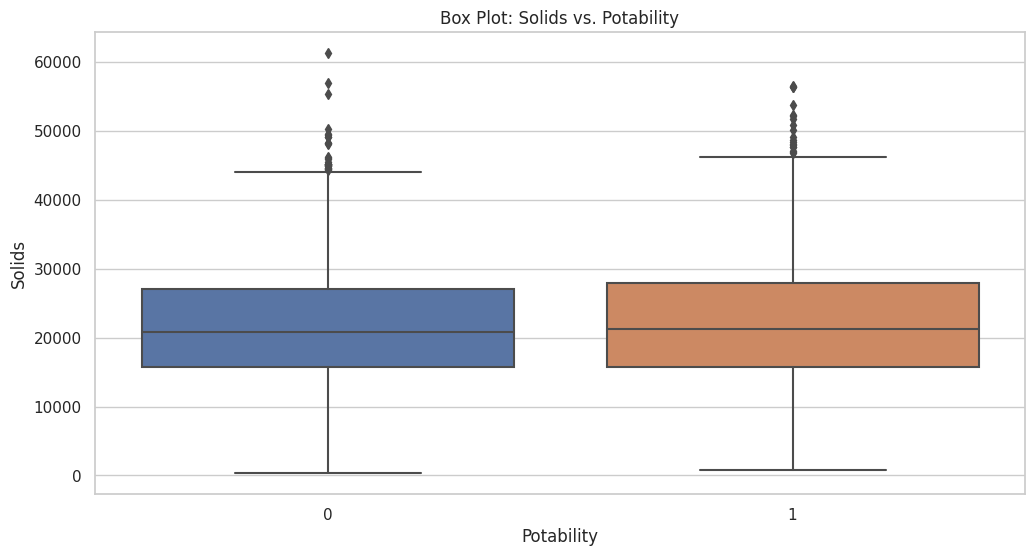

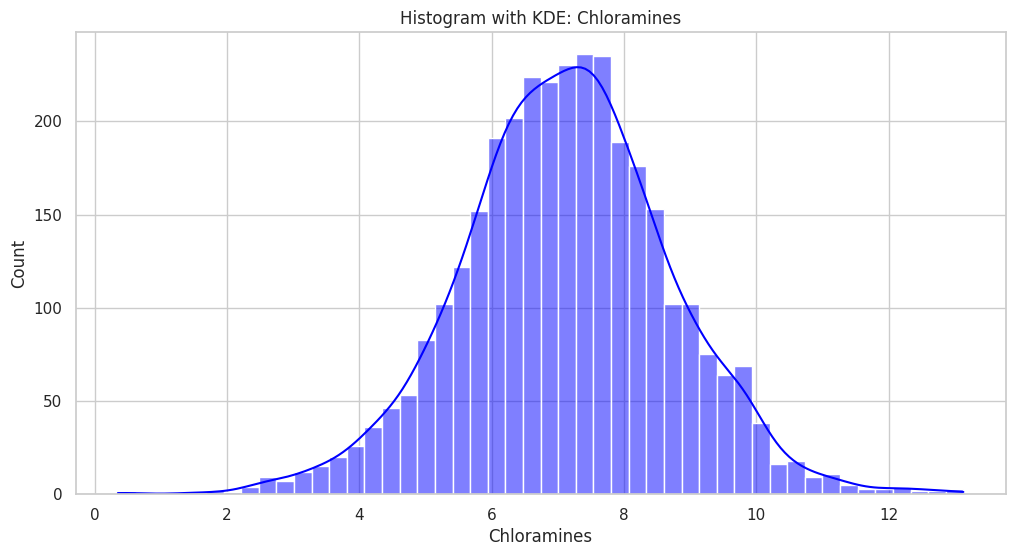

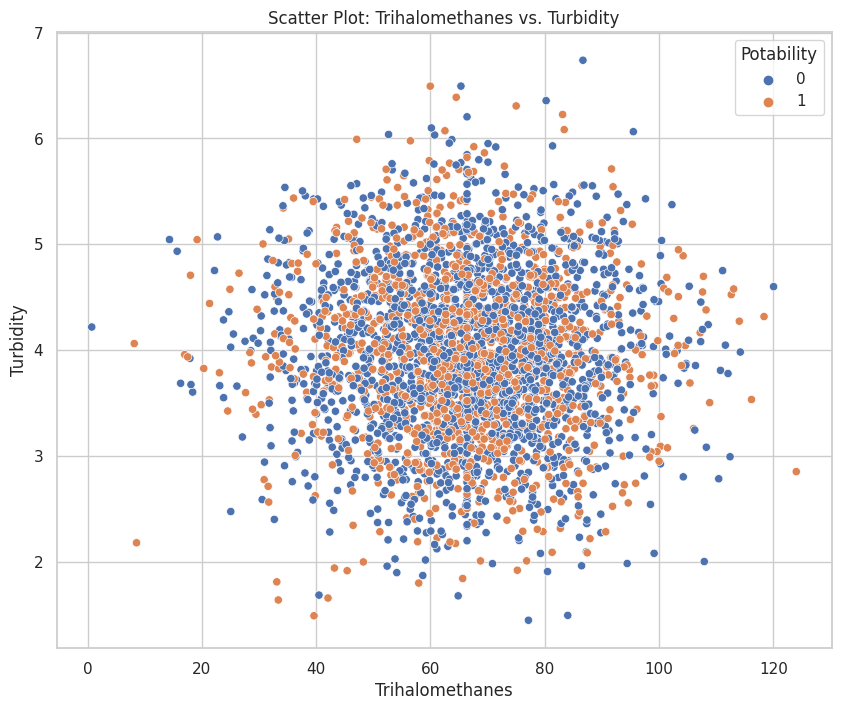

Text(0.5, 1.0, 'Scatter Plot: Trihalomethanes vs. Turbidity')

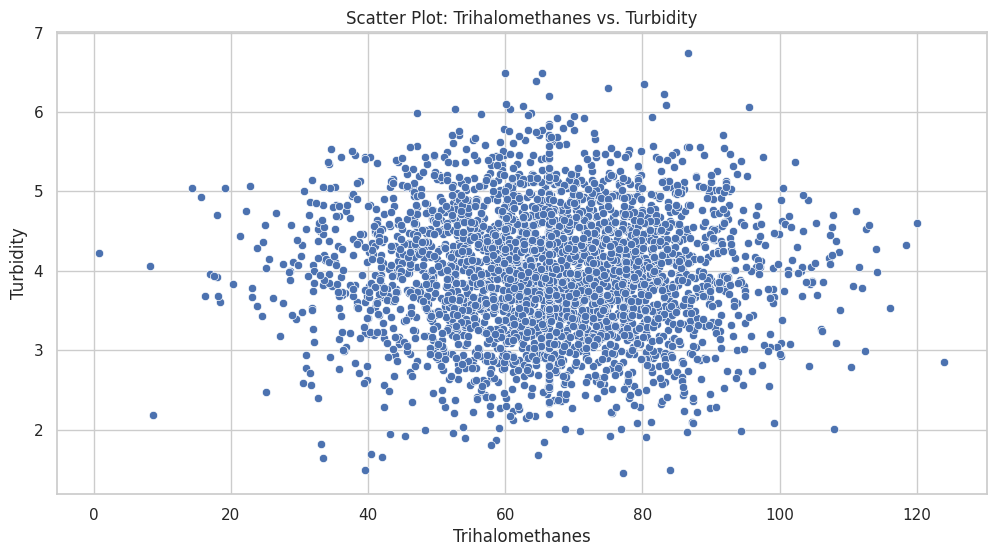

In [37]:

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Box Plots for Hardness and Solids
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Potability'], y=data['Hardness'])
plt.title('Box Plot: Hardness vs. Potability')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Potability'], y=data['Solids'])
plt.title('Box Plot: Solids vs. Potability')
plt.show()

# Histograms with Distributions (KDE)
plt.figure(figsize=(12, 6))
sns.histplot(data['Chloramines'], kde=True, color='blue')
plt.title('Histogram with KDE: Chloramines')
plt.show()

# Interactive Scatter Plot with Potability
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Trihalomethanes', y='Turbidity', data=data, hue='Potability')
plt.title('Scatter Plot: Trihalomethanes vs. Turbidity')
plt.show()

# Anomaly Detection Visualization (e.g., Trihalomethanes)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Trihalomethanes', y='Turbidity', data=data)
plt.title('Scatter Plot: Trihalomethanes vs. Turbidity')


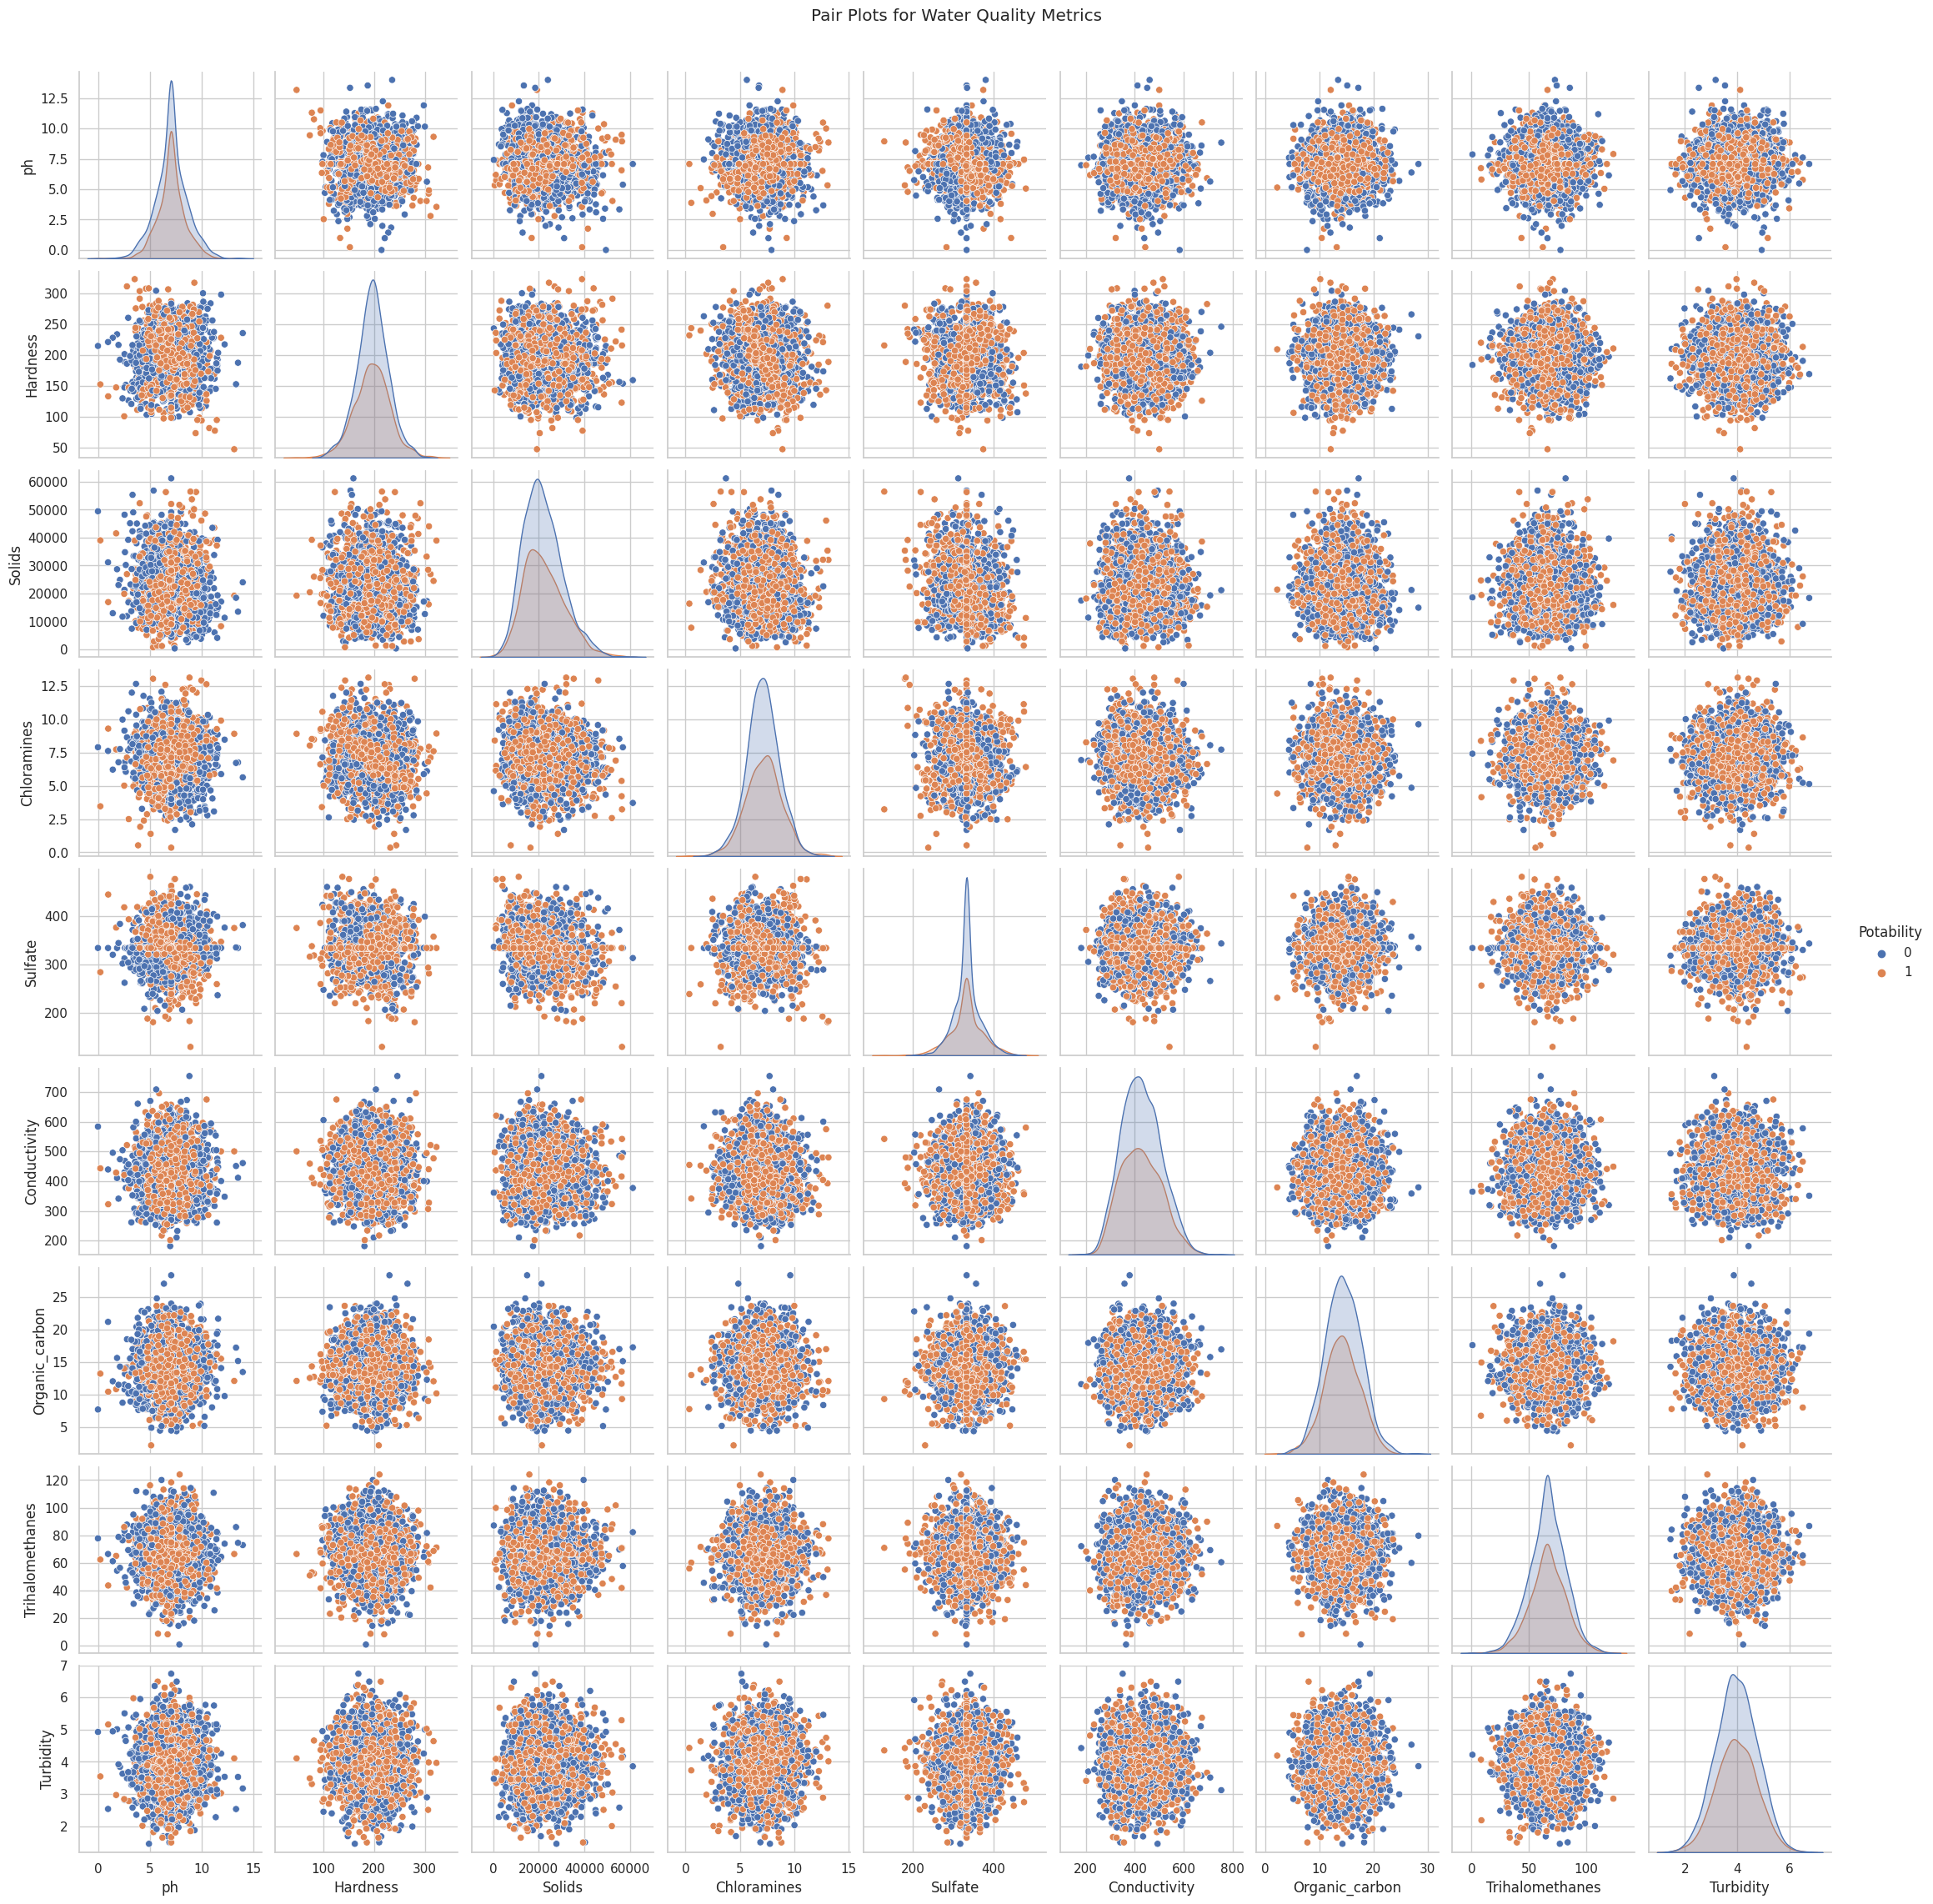

In [38]:
# Create pair plots for all metrics
sns.pairplot(data, hue='Potability', diag_kind='kde')
plt.suptitle('Pair Plots for Water Quality Metrics', y=1.02)
plt.show()


<ipython-input-39-2d1dfe13d921>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Hardness'], shade=True, color='b')


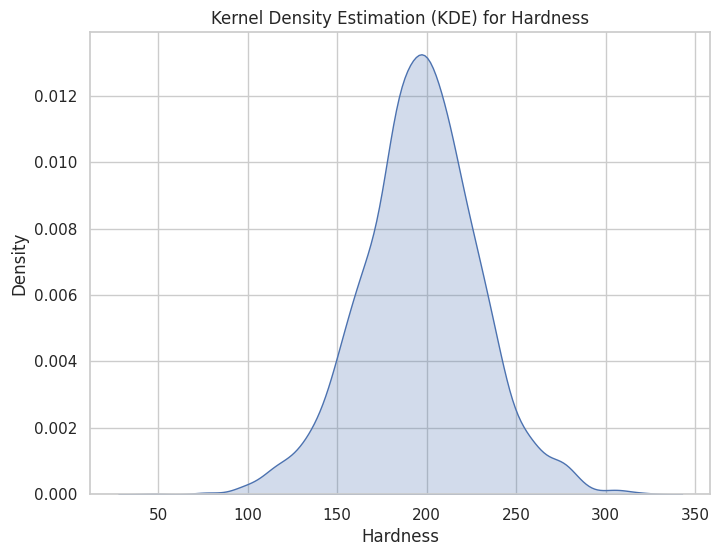

<ipython-input-39-2d1dfe13d921>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Sulfate'], shade=True, color='r')


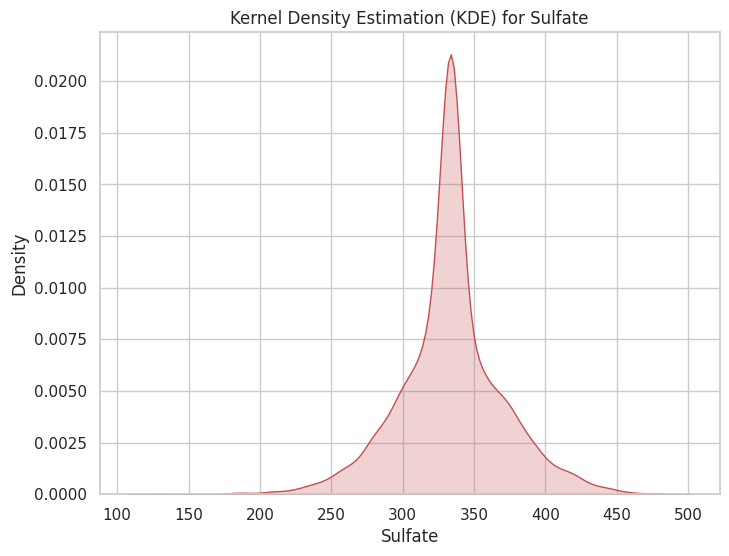

In [39]:
# KDE Plot for Hardness
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Hardness'], shade=True, color='b')
plt.xlabel('Hardness')
plt.title('Kernel Density Estimation (KDE) for Hardness')
plt.show()

# KDE Plot for Sulfate
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Sulfate'], shade=True, color='r')
plt.xlabel('Sulfate')
plt.title('Kernel Density Estimation (KDE) for Sulfate')
plt.show()


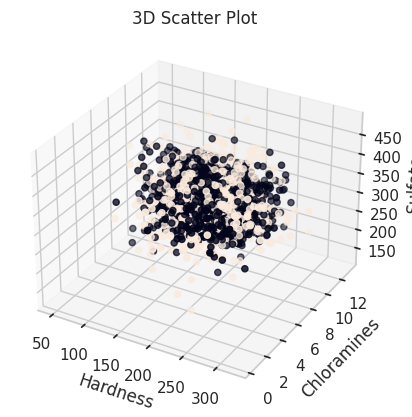

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Hardness'], data['Chloramines'], data['Sulfate'], c=data['Potability'])
ax.set_xlabel('Hardness')
ax.set_ylabel('Chloramines')
ax.set_zlabel('Sulfate')
ax.set_title('3D Scatter Plot')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


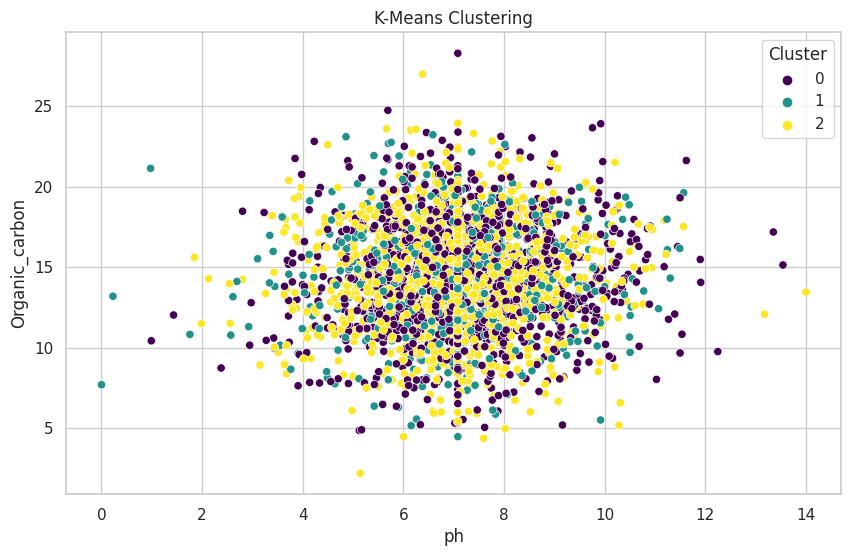

In [44]:
from sklearn.cluster import KMeans

# Assuming 'X' is your data after standardization
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
X['Cluster'] = kmeans.fit_predict(X)

# Create a scatter plot with color-coded clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ph', y='Organic_carbon', data=X, hue='Cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.show()
